# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.stats import skew
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [380]:
df_seguranca = pd.read_csv('marketing_campaign.csv', delimiter=';')
df = df_seguranca
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,46,709,43,182,42,118,247,4,5,0,1
2236,1946,PhD,Together,64014.0,2,56,406,0,30,0,0,8,5,7,0,1
2237,1981,Graduation,Divorced,56981.0,0,91,908,48,217,32,12,24,13,6,0,0
2238,1956,Master,Together,69245.0,0,8,428,30,214,80,30,61,10,3,0,1


In [381]:
# Verificando dados nulos
df.isnull().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0


In [382]:
# Dropando os Dados nulos por representarem muito pouco da nossa base
df.dropna(inplace=True)

In [383]:
# Verificando se foi feito a exclusao dos dados nulos
df.isnull().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0


In [384]:
df.dtypes

,0
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Recency,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64


In [385]:
# Verificando as Colunas Categoricas
print(f"Nivel Escolar: {df['Education'].unique()}")
print(f"Estado Civil: {df['Marital_Status'].unique()}")

Nivel Escolar: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Estado Civil: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [386]:
# Verificando Estado Civil Com algumas
print(f"Quantidade de Cada Estado Civil: {df['Marital_Status'].value_counts()}")
print(f"Porcentagem de cada Estado Civil: {df['Marital_Status'].value_counts(normalize=True) * 100}")

Quantidade de Cada Estado Civil: Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Porcentagem de cada Estado Civil: Marital_Status
Married     38.673285
Together    25.857401
Single      21.254513
Divorced    10.469314
Widow        3.429603
Alone        0.135379
Absurd       0.090253
YOLO         0.090253
Name: proportion, dtype: float64


In [387]:
print(f"Quantidade de Compras no Site: {df['WebPurchases'].value_counts()}")
print(f"Porcentagem de Compras no Site: {df['WebPurchases'].value_counts(normalize=True) * 100}")

Quantidade de Compras no Site: WebPurchases
1    1118
0    1098
Name: count, dtype: int64
Porcentagem de Compras no Site: WebPurchases
1    50.451264
0    49.548736
Name: proportion, dtype: float64


In [388]:
# Temos apenas 1% dos clientes reclmando entao vou dropar essa coluna por conta disso.
print(f"Quantidade de Avaliacao dos Clientes: {df['Complain'].value_counts()}")
print(f"Porcentagem de Avaliacao dos Clientes: {df['Complain'].value_counts(normalize=True) * 100}")

Quantidade de Avaliacao dos Clientes: Complain
0    2195
1      21
Name: count, dtype: int64
Porcentagem de Avaliacao dos Clientes: Complain
0    99.052347
1     0.947653
Name: proportion, dtype: float64


In [389]:
# Mudando os valores digitados errados para Single
df['Marital_Status'] = df['Marital_Status'].replace({
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
})

print(f"Quantidade de Cada Estado Civil: {df['Marital_Status'].value_counts()}")

Quantidade de Cada Estado Civil: Marital_Status
Married     857
Together    573
Single      554
Divorced    232
Name: count, dtype: int64


In [390]:
print(f"Quantidade por cada Nivel Escolar:  {df['Education'].value_counts()}")
print(f"Porcentagem por Nivel Escolar:  {df['Education'].value_counts(normalize=True) * 100}")

Quantidade por cada Nivel Escolar:  Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
Porcentagem por Nivel Escolar:  Education
Graduation    50.361011
PhD           21.705776
Master        16.471119
2n Cycle       9.025271
Basic          2.436823
Name: proportion, dtype: float64


In [391]:
df['Education'] = df['Education'].replace({
    '2n Cycle': 'Master'
})

In [392]:
df.select_dtypes(include=['number']).describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,5.800993,5.319043,0.009477,0.504513
std,11.985554,25173.076661,0.536896,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,3.250785,2.425359,0.096907,0.500092
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,5.000000,6.000000,0.000000,1.000000
75%,1977.000000,68522.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,8.000000,7.000000,0.000000,1.000000
max,1996.000000,666666.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,13.000000,20.000000,1.000000,1.000000


In [393]:
percentual = (df['MntWines'] > 1200).mean() * 100
print(f"{percentual:.2f}%")

1.90%


In [394]:
percentual = (df['NumWebVisitsMonth'] > 12.5).mean() * 100
print(f"{percentual:.2f}%")

0.41%


In [395]:
percentual = (df['MntFruits'] > 150).mean() * 100
print(f"{percentual:.2f}%")

2.62%


In [396]:
percentual = (df['MntMeatProducts'] > 1200).mean() * 100
print(f"{percentual:.2f}%")

0.18%


In [397]:
# Dropando Outliers
df.drop(df[df['Income'] > 140000].index, inplace=True)
df.drop(df[df['Year_Birth'] < 1920].index, inplace=True)
df.drop(df[df['MntWines'] > 1100].index, inplace=True)
df.drop(df[df['NumWebVisitsMonth'] > 12.5].index, inplace=True)
df.drop(df[df['MntFruits'] > 150].index, inplace=True)
df.drop(df[df['MntMeatProducts'] > 1200].index, inplace=True)

In [398]:
# Trazendo Colunas com muitos outliers para a mediana

colunas = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds']
mediana = df[colunas].median()

for coluna in colunas:
    Q1, Q3 = df[coluna].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    limites = Q1 - 2.0*IQR, Q3 + 2.0*IQR
    mediana = df[coluna].median()
    df[coluna] = np.where(~df[coluna].between(*limites), mediana, df[coluna])

In [399]:
df.select_dtypes(include=['number']).describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
count,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000
mean,1968.951667,50378.845336,0.464959,49.213146,270.552924,14.446593,109.443693,20.693572,14.217980,32.493475,5.708072,5.365877,0.009667,0.491058
std,11.613313,20042.412176,0.541645,29.090942,293.534235,19.193272,136.717053,27.847625,19.220052,33.296113,3.193144,2.256308,0.097866,0.500041
min,1940.000000,4428.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,34578.000000,0.000000,24.000000,22.000000,1.000000,15.000000,3.000000,1.000000,8.000000,3.000000,4.000000,0.000000,0.000000
50%,1970.000000,49605.000000,0.000000,49.000000,159.000000,7.000000,59.000000,11.000000,8.000000,23.000000,5.000000,6.000000,0.000000,0.000000
75%,1977.000000,66303.000000,1.000000,74.000000,459.000000,19.000000,141.000000,25.000000,18.000000,43.000000,8.000000,7.000000,0.000000,1.000000
max,1996.000000,113734.000000,2.000000,99.000000,1099.000000,82.000000,573.000000,123.000000,88.000000,146.000000,13.000000,10.000000,1.000000,1.000000


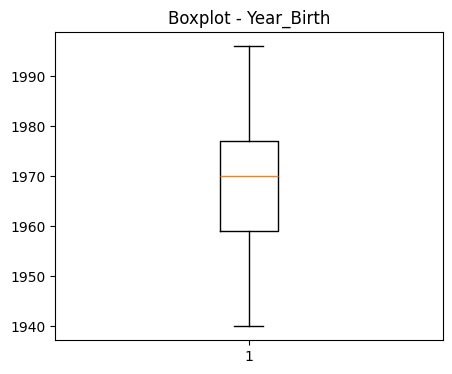

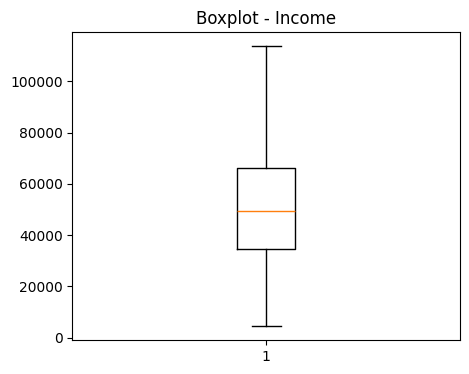

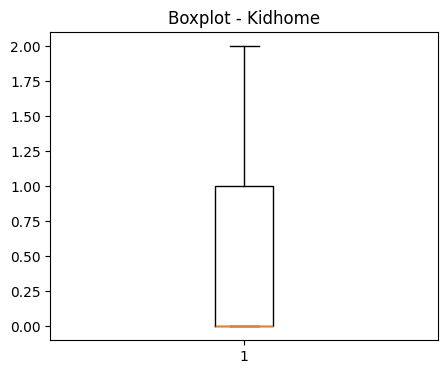

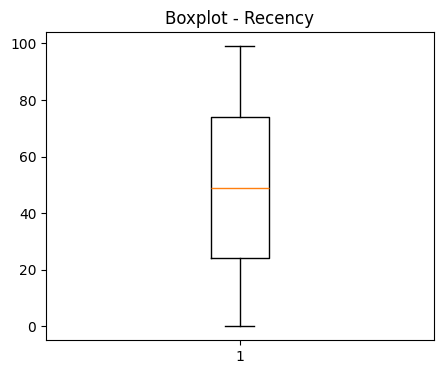

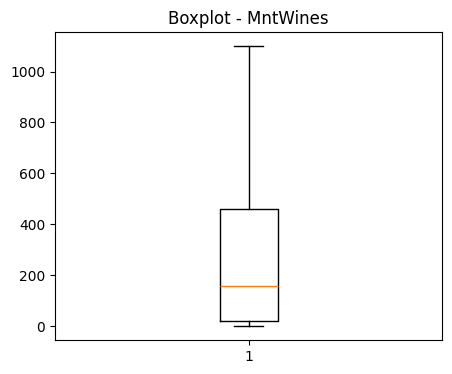

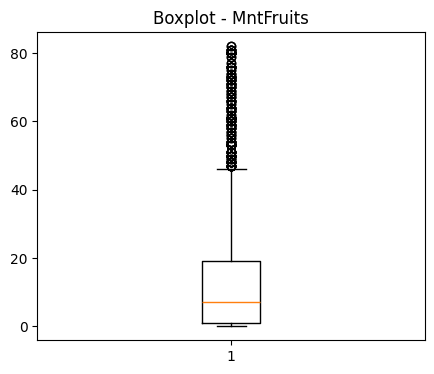

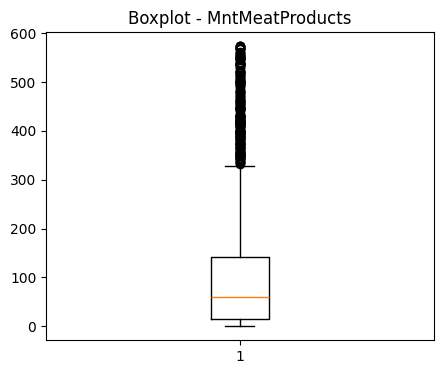

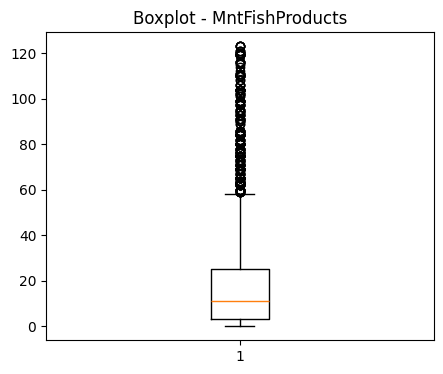

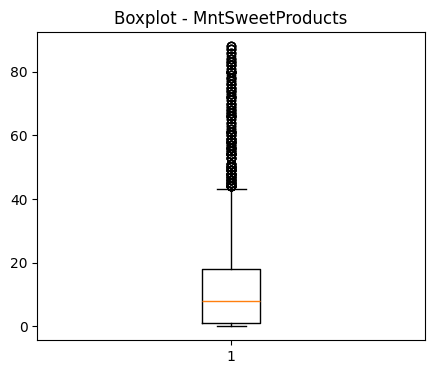

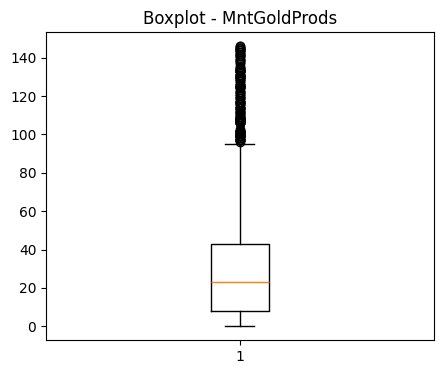

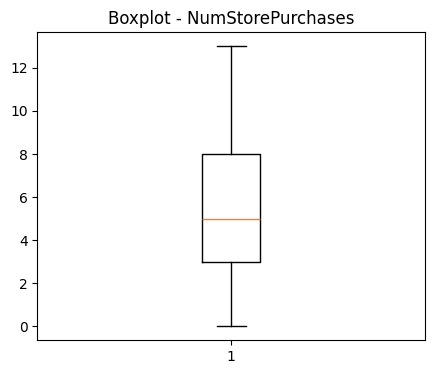

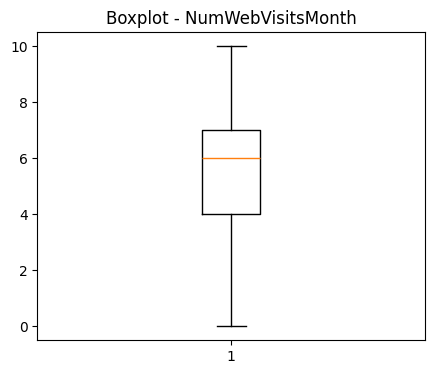

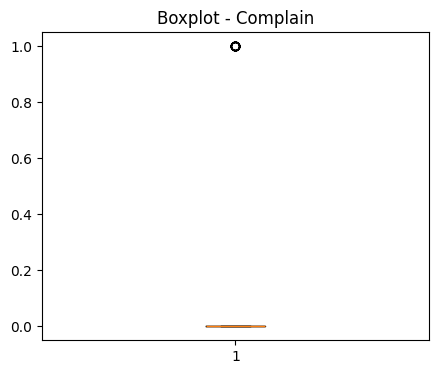

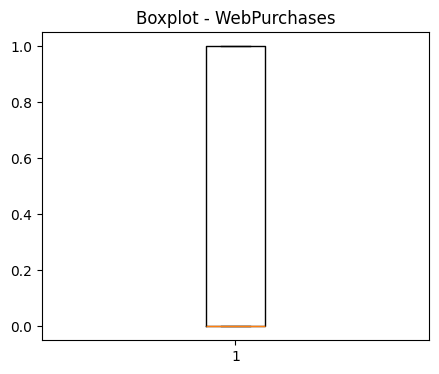

In [400]:
# Plotando Bloxplots para detectar outliers
for coluna in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(5, 4))
    plt.boxplot(df[coluna].dropna())
    plt.title(f"Boxplot - {coluna}")
    plt.show()

In [401]:
# Grafico para ver a relacao entre Visitas no mes e total de compras
df_agrupado = df.groupby(['WebPurchases', 'NumWebVisitsMonth']).size().reset_index(name='count')
total_por_compra = df_agrupado.groupby('WebPurchases')['count'].transform('sum')
df_agrupado['percent'] = (df_agrupado['count'] / total_por_compra) * 100

fig = px.bar(df_agrupado, x='NumWebVisitsMonth', y='percent', color='WebPurchases',
             barmode='stack', labels={'WebPurchases': 'Compras Feitas',
                                      'percent': 'Porcentagem',
                                      'NumWebVisitsMonth' : 'Visitas No mes'})

fig.update_layout(title='Relacao entre Compras Feitas e Visitas ao Site',
                  yaxis_title='Porcentagem', legend_title='WebPurchases')

Podemos Ver que a maioria dos nosso Clientes visitam bastante o site e o publico que mais compra e o que visita o site 7 vezes mensalmente

In [402]:
df_agrupado = df.groupby(['WebPurchases', 'Education']).size().reset_index(name='count')
total_por_compra = df_agrupado.groupby('WebPurchases')['count'].transform('sum')
df_agrupado['percent'] = (df_agrupado['count'] / total_por_compra) * 100

fig = px.bar(df_agrupado, x='Education', y='percent', color='WebPurchases',
             barmode='stack', labels={'WebPurchases': 'Compras Feitas',
                                      'percent': 'Porcentagem',
                                      'Education' : 'Nivel de Escolaridade'})

fig.update_layout(title='Relacao entre Compras Feitas e Escolaridade',
                  yaxis_title='Porcentagem', legend_title='Education')

Podemos ver que Graduados tem o maior numero de compras no nosso site

In [403]:
df_agrupado = df.groupby(['WebPurchases', 'Kidhome']).size().reset_index(name='count')
total_por_compra = df_agrupado.groupby('WebPurchases')['count'].transform('sum')
df_agrupado['percent'] = (df_agrupado['count'] / total_por_compra) * 100

fig = px.bar(df_agrupado, x='Kidhome', y='percent', color='WebPurchases',
             barmode='stack', labels={'WebPurchases': 'Compras Pelo Site',
                                      'percent': 'Porcentagem',
                                      'Kidhome' : 'Quantia de Crianças'})

fig.update_layout(title='Relacao entre Compras Feitas e Quantia de Crianças',
                  yaxis_title='Porcentagem', legend_title='Kidhome')

As pessoas que mais compram no Site são as que não tem filhos em casa

# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








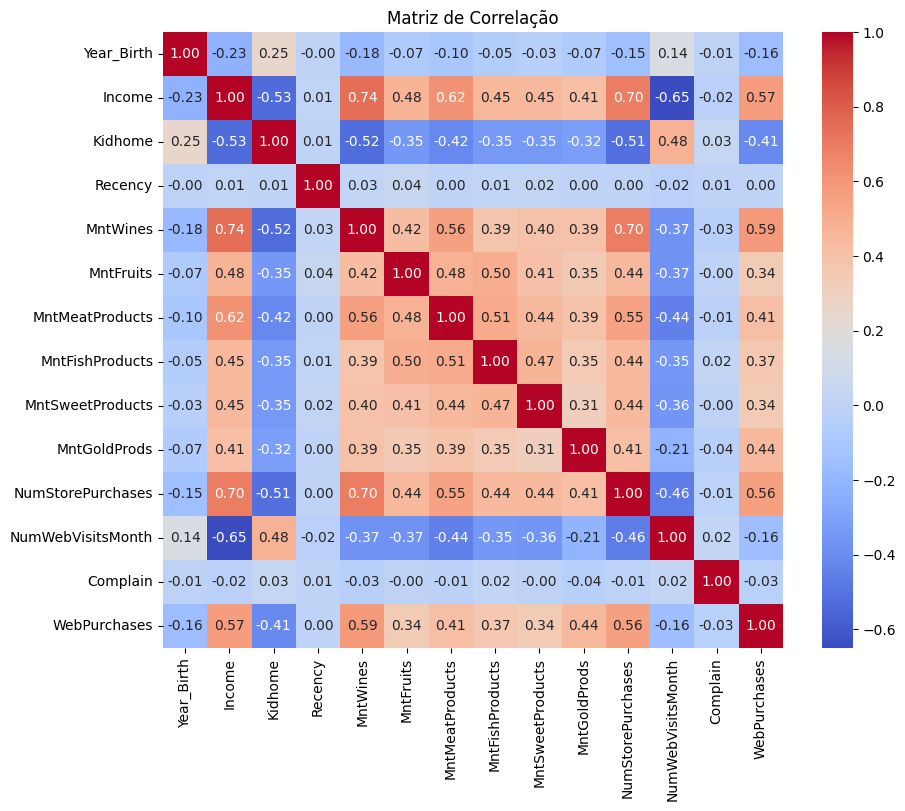

In [404]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            annot_kws={'size': 10})
plt.title('Matriz de Correlação')
plt.show()

In [405]:
le = LabelEncoder()
df['Education_Encoder'] = le.fit_transform(df['Education'])
df['Marital_Status_Encoder'] = le.fit_transform(df['Marital_Status'])

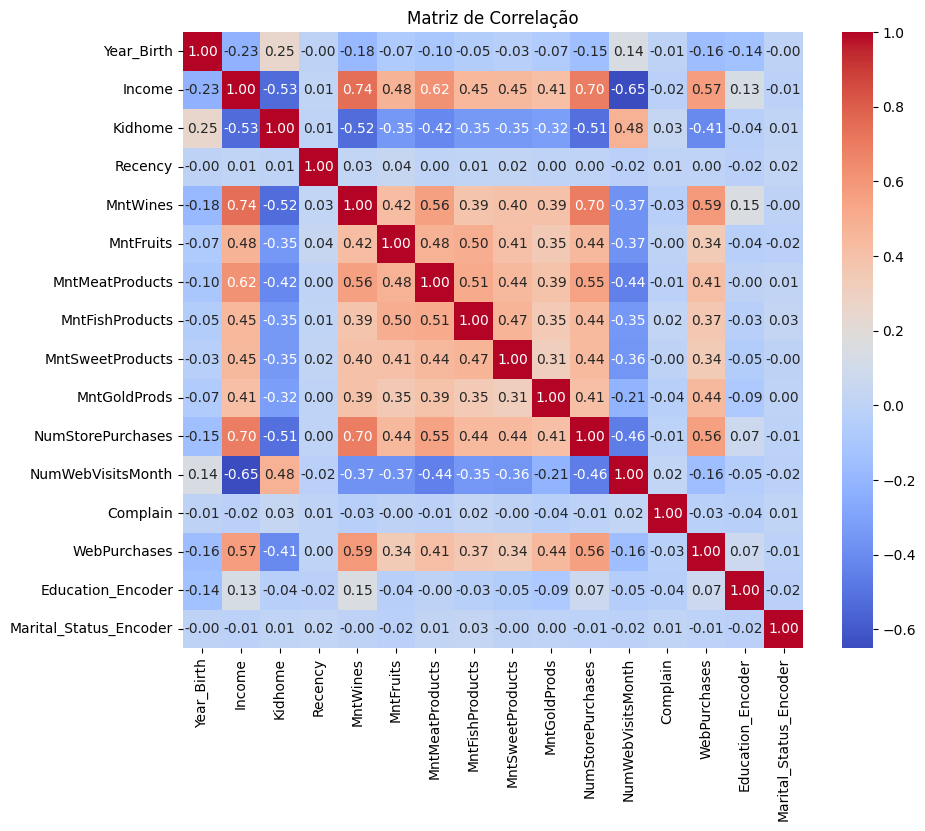

In [406]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            annot_kws={'size': 10})
plt.title('Matriz de Correlação')
plt.show()

In [407]:
# Dropando Colunas que nao tem Correlacao
df.drop('Complain', axis=1, inplace=True)
df.drop('Recency', axis=1, inplace=True)
df.drop('Education_Encoder', axis=1, inplace=True)
df.drop('Marital_Status_Encoder', axis=1, inplace=True)
df.drop('Year_Birth', axis=1, inplace=True)
df.drop('Education', axis=1, inplace=True)
df.drop('Marital_Status', axis=1, inplace=True)

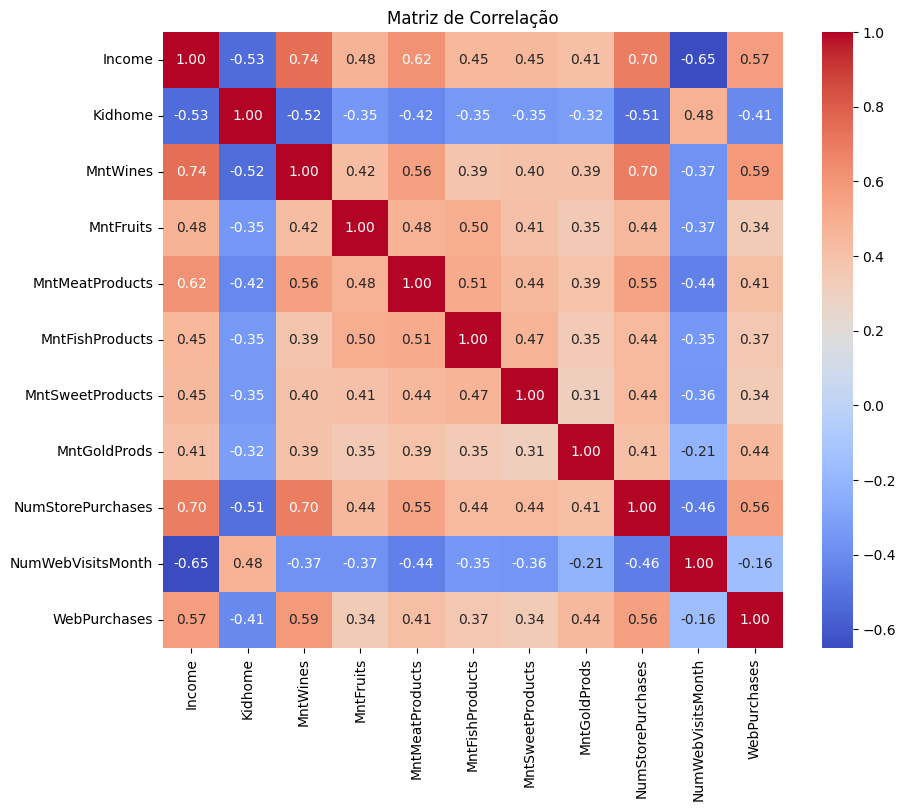

In [408]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            annot_kws={'size': 10})
plt.title('Matriz de Correlação')
plt.show()

In [409]:
X = df.drop('WebPurchases', axis=1)
y = df['WebPurchases']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=29
)

print(f"Treino: {X_train.shape}, Teste: {X_test.shape}")

Treino: (1448, 10), Teste: (621, 10)


In [410]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [411]:
# Criando o modelo de Regressao
logistica = LogisticRegression(max_iter=100)  # max_iter aumenta para garantir convergência

# Treinando o modelo
logistica.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred = logistica.predict(X_test_scaled)

In [412]:
# Criando o modelo RandomForest
floresta = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 árvores

# Treinando
floresta.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred_floresta = floresta.predict(X_test_scaled)

# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

In [413]:
# Avaliando Regressao Logistica
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.8663446054750402
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       317
           1       0.86      0.86      0.86       304

    accuracy                           0.87       621
   macro avg       0.87      0.87      0.87       621
weighted avg       0.87      0.87      0.87       621



In [414]:
# Avaliando RandomForest
print("Acurácia:", accuracy_score(y_test, y_pred_floresta))
print(classification_report(y_test, y_pred_floresta))

Acurácia: 0.9146537842190016
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       317
           1       0.89      0.95      0.92       304

    accuracy                           0.91       621
   macro avg       0.92      0.92      0.91       621
weighted avg       0.92      0.91      0.91       621



In [415]:
cm = confusion_matrix(y_test, y_pred)

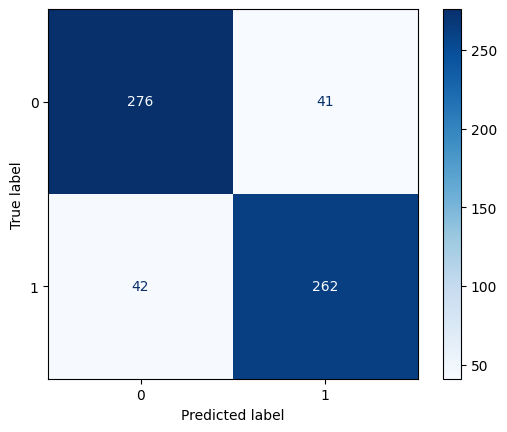

In [416]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

In [417]:
cm = confusion_matrix(y_test, y_pred_floresta)

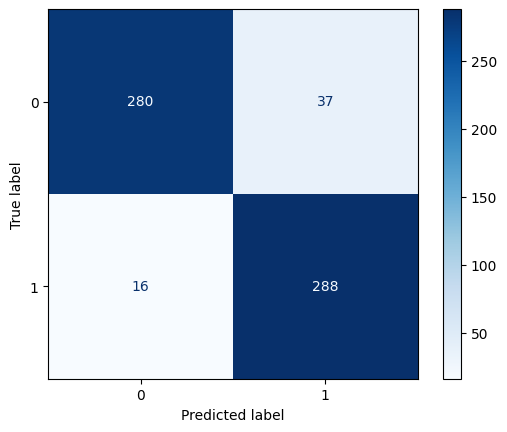

In [418]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

O RandomForest para esses dados parece se adaptar muito bem aos dados do conjunto, tendo uma precisão, recall e f1-score maiores que os da Regressão Logística, e podemos ver que na matriz de confusão ele acertou bem mais também.